In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product
import numpy as np
import xarray as xr
from scipy import stats as scistats
import seawater as sw

import matplotlib.pyplot as plt

import metabolic as mi
import util

## Read traits and examine distributions

In [23]:
df.Ac.max()

0.552778623242043

In [14]:
25/100

0.25

In [86]:
#Eo = xr.DataArray(Eo_bins, dims=('Eo'))
#Ac = xr.DataArray(Ac_bins, dims=('Ac'))

In [87]:
dEdTbar = -0.0226

In [96]:
import metabolic as mi
from itertools import product
nj, ni = len(Eo_bins), len(Ac_bins)

vol = np.empty((nj, ni))

for j, i in product(range(nj), range(ni)):
    phi_prime = mi.Phi(ds.pO2, ds.t_an, Ac_bins[i], Eo_bins[j], dEodT=dEdTbar)
    vol[j, i] = xr.where(phi_prime > 1., 1., 0.).sum()
    

/glade/work/mclong/miniconda3/envs/metabolic/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


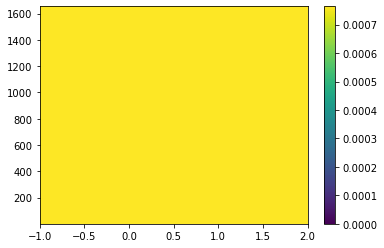

In [101]:
plt.pcolormesh(Eo_bins, Ac_bins, vol.T / vol.sum())
plt.colorbar()

In [ ]:
plt.pcolormesh(vol)


## Demonstrate root finding technique to solve to ATmax

Loop over traits and values of pO$_2$ to find ATmax

cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0.25
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0.5
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 1.0
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0.25
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 0.5
cannot find root: Ac = 2.613597328966256; Eo = -0.191; pO2 = 1.0
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0.25
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0.5
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 1.0
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0.25
cannot find root: Ac = 2.613597328966256; Eo = 0.3389; pO2 = 0.5
cannot find root: Ac = 2.6135

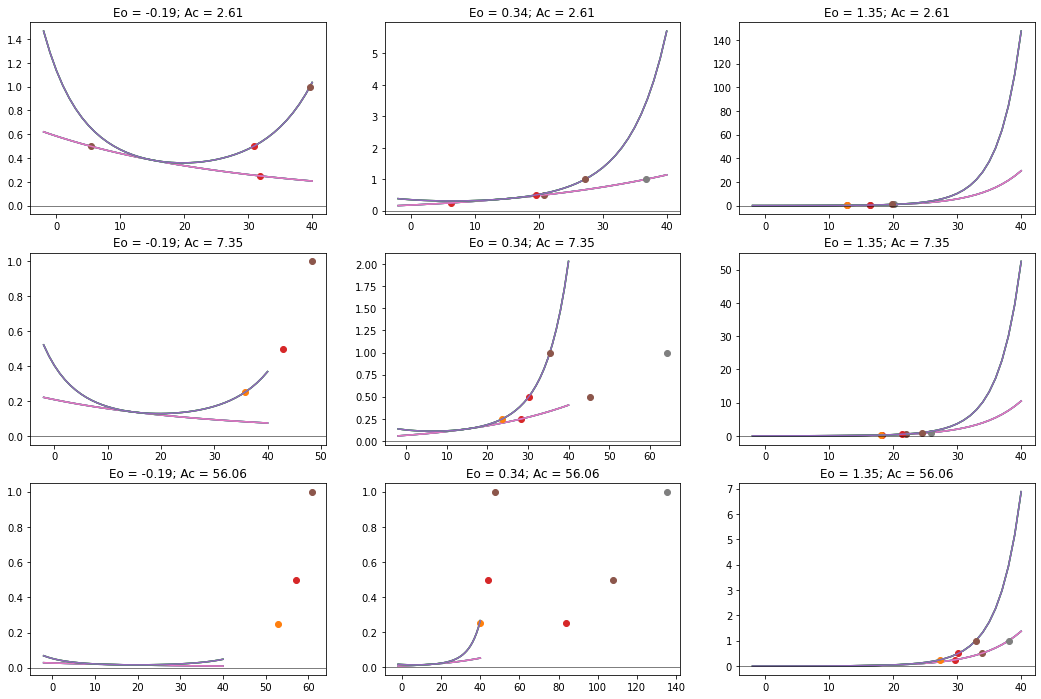

In [9]:
Ac_dist = np.percentile(df.Ac, [0, 50, 100])
Eo_dist = np.percentile(df.Eo, [0, 50, 100])

nrow = len(Ac_dist)
ncol = len(Eo_dist)
figsize = (6, 4)
fig, axs = plt.subplots(
    nrow, ncol, 
    figsize=(figsize[0]*ncol, figsize[1]*nrow),                       
    constrained_layout=False,
    squeeze=False,
)    

T = np.arange(-2., 41., 1.)

for i, j in product(range(nrow), range(ncol)):
    ax = axs[i, j]
    Ac = Ac_dist[i]
    Eo = Eo_dist[j]
    for dEodT in [0., 0.02,]:
        for po2 in [0, 0.25, 0.5, 1.]:
            p = ax.plot(T, mi.pO2_at_Phi_crit(T, Ac, Eo, dEodT))
            #print(f'cannot find root: Ac = {Ac}; Eo = {Eo}; pO2 = {po2}')
            Tmax_hi = mi.compute_ATmax(po2, Ac, Eo, dEodT=dEodT)
            ax.plot(Tmax_hi, po2, 'o')
    ax.axhline(0., lw=0.5, c='k')        
    ax.set_title(f'Eo = {Eo:0.2f}; Ac = {Ac:0.2f}')